# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec GitHub (Develop, Verify, Commit)
- Générer un dataset synthetic de classification 2D avec la librairie sklearn
- Visualiser les classes du dataset sur un graphique 2D
- Visualiser les prédictions de votre réseau de neurones sur un graphique 2D.
- (BONUS) Introduction au Refactoring: vous refactoriserez un code jupyter pour en faire une fonction réutilisable.

In [1]:
# Importer les libraries utiles

import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [11]:
# Créer un dataset séparable par une ligne droite en 2D

train_size = 100
test_size  =  50

total_size = train_size + test_size 

print("Total Size : ", total_size)

X, y = make_classification(n_samples=total_size,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)

Total Size :  150


In [5]:
X.shape, y.shape

((150, 2), (150,))

In [6]:
y = y.reshape(-1, 1)

y.shape

(150, 1)

In [7]:
X[:10], y[:10]

(array([[ 0.05065666, -1.04565042],
        [ 1.89212817,  0.14141529],
        [ 2.07731874, -1.10588188],
        [-0.21268004,  1.55015655],
        [ 1.33003867, -0.93929107],
        [ 0.9684331 , -1.14497058],
        [-0.12252602, -0.92897868],
        [-2.11442959, -0.72665594],
        [ 1.30958609, -1.03968501],
        [ 1.22239591, -1.00761238]]), array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]]))

In [8]:
# Séparer en train / test

X_train, y_train = (X[:train_size], y[:train_size])
X_test , y_test  = (X[-test_size:], y[-test_size:])

assert X_test.shape[0] + X_train.shape[0] == total_size
assert y_test.shape[0] + y_train.shape[0] == total_size

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 2) (100, 1)
(50, 2) (50, 1)


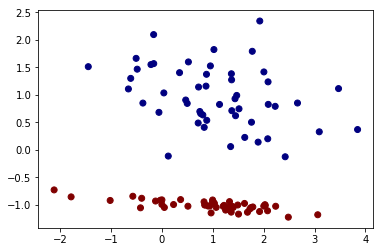

In [13]:
# Visualiser le dataset d'une manière informative

plt.scatter(X_train[:, 0], X_train[:, 1],
           c=y_train[:, 0],
           cmap=plt.cm.jet)

In [ ]:
# Créer une fonction qui split le dataset

In [26]:
# Créer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 



X, y = make_classification(n_samples=200,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)

for each in (X, y):
    print(each.shape)

print()

X_train, y_train, X_test, y_test = split_dataset(X, y)

for each in (X_train, y_train, X_test, y_test):
    print(each.shape)

(200, 2)
(200,)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


In [21]:
X_train[:10], y_train[:10]

(array([[ 0.71103618,  0.60718786],
        [ 1.12300813, -0.09221945],
        [ 1.891575  , -1.21810421],
        [ 0.00901172, -1.25159782],
        [ 1.97196595, -2.14504997],
        [ 0.87987502, -0.33963526],
        [ 0.2180234 ,  1.10058257],
        [ 1.148998  ,  0.27105545],
        [ 0.83850123, -3.27970069],
        [-0.33602045,  1.42538392]]), array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0]]))

In [22]:
X_test[:10], y_test[:10]

(array([[-0.00998307, -2.81238653],
        [ 0.99051914, -0.06581064],
        [ 0.41040433,  0.64187432],
        [ 1.00625181,  2.26858377],
        [ 0.91408668, -1.87050133],
        [-0.55054219, -1.81699559],
        [ 1.04461957, -2.74175343],
        [-0.25284383, -1.32697087],
        [ 1.55309128, -0.33144826],
        [ 1.70495993,  2.78908214]]), array([[1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0]]))

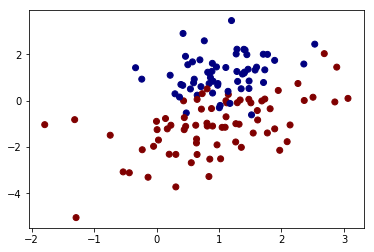

In [23]:
# Visualiser le dataset d'une manière informative

plt.scatter(X_train[:, 0], X_train[:, 1],
           c=y_train[:, 0],
           cmap=plt.cm.jet)